In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
import pandas as pd
import numpy as np
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


### Read Data

In [7]:
raw_data=pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv")
raw_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM


# Feature Engineering

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   day_id                    2893 non-null   object 
 1   city_id                   2893 non-null   object 
 2   temperature_celsius       2893 non-null   float64
 3   condition_text            479 non-null    object 
 4   wind_kph                  2893 non-null   float64
 5   wind_degree               2893 non-null   int64  
 6   pressure_mb               2893 non-null   float64
 7   precip_mm                 2893 non-null   float64
 8   humidity                  2893 non-null   int64  
 9   cloud                     2893 non-null   int64  
 10  feels_like_celsius        2893 non-null   float64
 11  visibility_km             2893 non-null   float64
 12  uv_index                  2893 non-null   float64
 13  gust_kph                  2893 non-null   float64
 14  air_qual

### Visualize Data

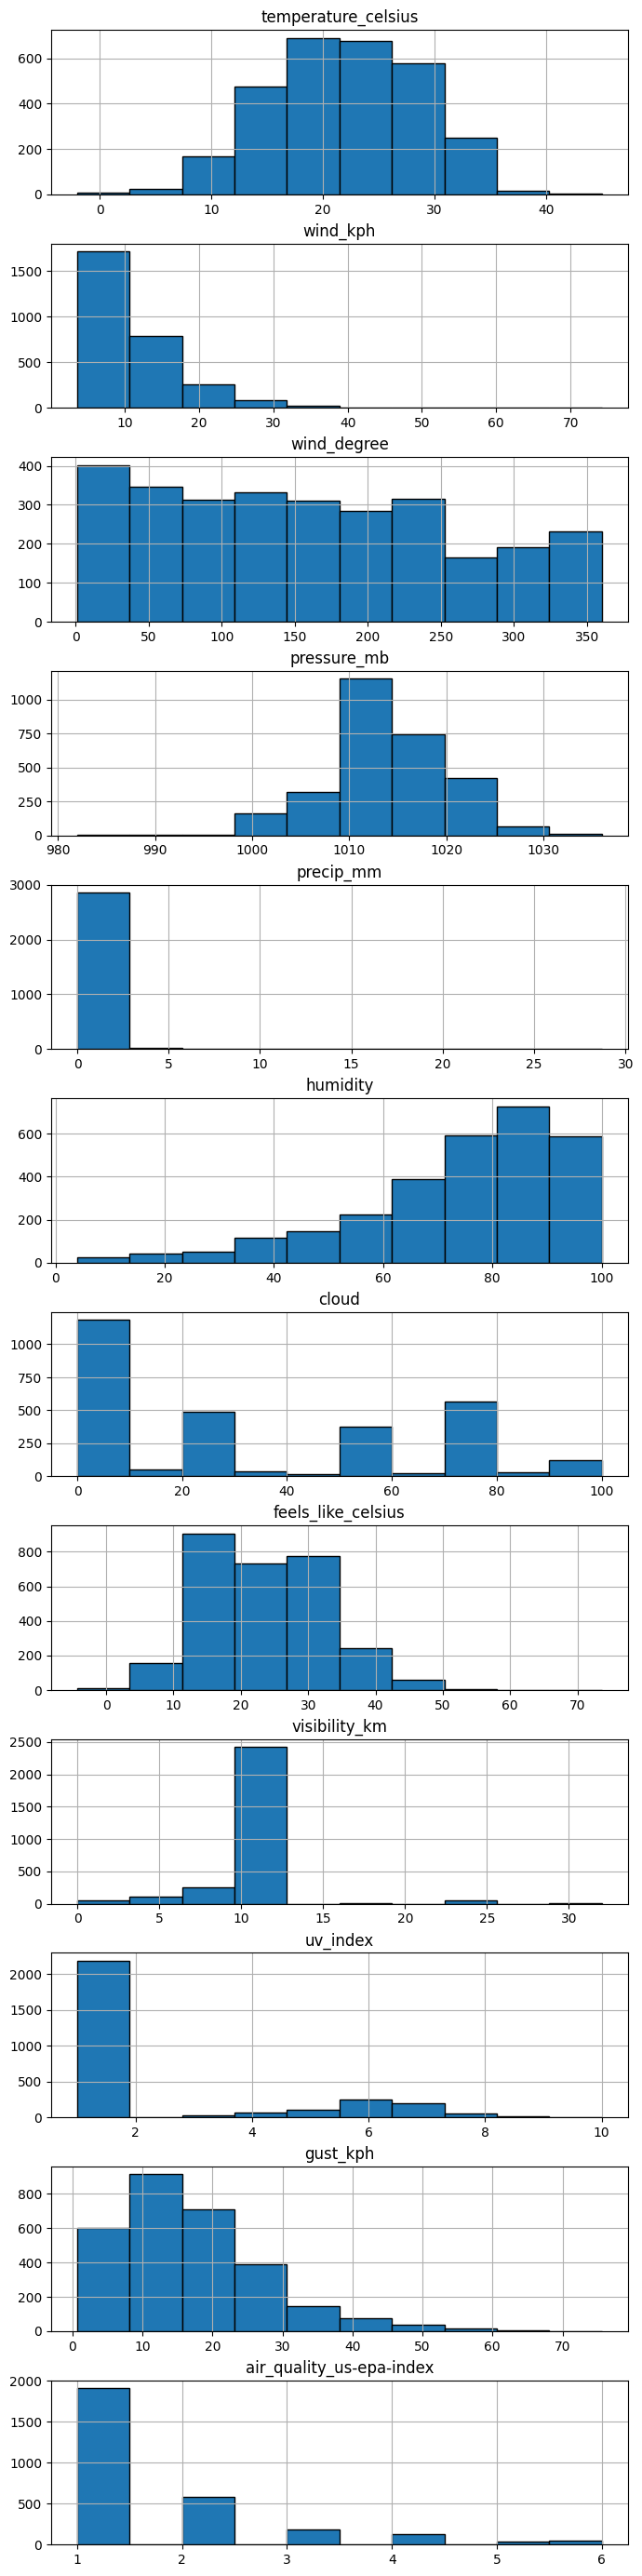

In [9]:
raw_data.hist(bins=10, figsize=(8, 50), layout=(len(raw_data.columns), 1), edgecolor='black')
plt.show()

temperature_celsius         Axes(0.125,0.841881;0.775x0.0381188)
wind_kph                    Axes(0.125,0.796139;0.775x0.0381188)
wind_degree                 Axes(0.125,0.750396;0.775x0.0381188)
pressure_mb                 Axes(0.125,0.704653;0.775x0.0381188)
precip_mm                   Axes(0.125,0.658911;0.775x0.0381188)
humidity                    Axes(0.125,0.613168;0.775x0.0381188)
cloud                       Axes(0.125,0.567426;0.775x0.0381188)
feels_like_celsius          Axes(0.125,0.521683;0.775x0.0381188)
visibility_km               Axes(0.125,0.475941;0.775x0.0381188)
uv_index                    Axes(0.125,0.430198;0.775x0.0381188)
gust_kph                    Axes(0.125,0.384455;0.775x0.0381188)
air_quality_us-epa-index    Axes(0.125,0.338713;0.775x0.0381188)
dtype: object

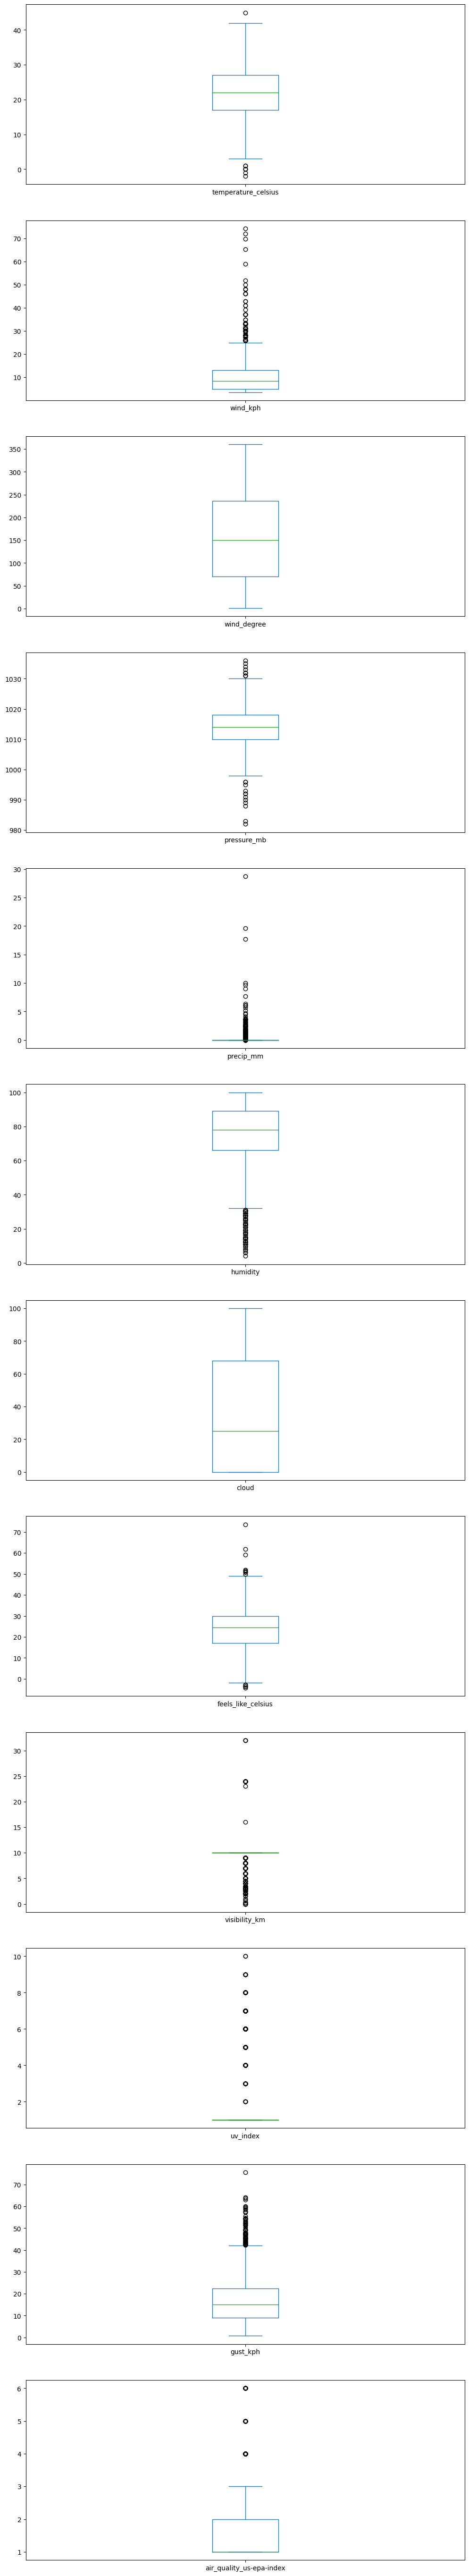

In [10]:
raw_data.plot(kind='box', subplots=True, layout=(len(raw_data.columns),1), figsize=(12, 100), sharex=False, sharey=False)


### Encoding Categorical Data

In [12]:
raw_data['city_id'], _ = raw_data['city_id'].factorize()
data=raw_data.dropna()
label_encoder = preprocessing.LabelEncoder() 
data['condition_text']= label_encoder.fit_transform(data['condition_text']) 
 

/tmp/ipykernel_33/3636840961.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['condition_text']= label_encoder.fit_transform(data['condition_text'])


## kendell's correlation

In [13]:
for colname in []:
    data[colname], _ = data[colname].factorize()

matrix = data[[ 'city_id', 'temperature_celsius', 'condition_text',
       'wind_kph', 'wind_degree', 'pressure_mb', 'precip_mm', 'humidity',
       'cloud', 'feels_like_celsius', 'visibility_km', 'uv_index', 'gust_kph',
       'air_quality_us-epa-index']].corr(method="kendall")

In [14]:
train=data[['temperature_celsius','wind_kph','city_id','pressure_mb','precip_mm','uv_index','humidity','cloud' ,'condition_text' ,'visibility_km']]
y=train.pop('condition_text')
X_train, X_test, y_train, y_test = train_test_split(
  train,y , random_state=104,test_size=0.1, shuffle=True)

In [18]:
# Make predictions
import catboost as cat
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

xgb_model  = XGBClassifier(random_state=0 ,n_estimators=50)
xgb_model .fit(X_train,y_train)  
lgb_model  = LGBMClassifier(learning_rate=0.05, n_estimators=1000)
lgb_model .fit(X_train, y_train)
cat_model = cat.CatBoostClassifier(verbose=0,iterations=100 ,learning_rate=0.1)
cat_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

print(lgb_pred)
print(xgb_pred)
print(cat_pred.reshape((X_test.shape[0])))

# Convert LightGBM predictions to class labels
# lgb_pred = np.argmax(lgb_pred, axis=1)

# Combine predictions using max voting
predictions = np.vstack((lgb_pred, xgb_pred, cat_pred.reshape((X_test.shape[0])))).T
final_predictions = []

for pred in predictions:
    final_predictions.append(np.bincount(pred).argmax())

# Evaluate the ensemble
accuracy = accuracy_score(y_test, final_predictions)
print(f'Max Voting Ensemble Accuracy: {accuracy:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 309
[LightGBM] [Info] Number of data points in the train set: 431, number of used features: 9
[LightGBM] [Info] Start training from score -1.365628
[LightGBM] [Info] Start training from score -2.304908
[LightGBM] [Info] Start training from score -2.023057
[LightGBM] [Info] Start training from score -3.358058
[LightGBM] [Info] Start training from score -2.215960
[LightGBM] [Info] Start training from score -3.581201
[LightGBM] [Info] Start training from score -1.347609
[LightGBM] [Info] Start training from score -3.070376
[LightGBM] [Info] Start training from score -3.358058
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

# load test data

In [19]:
test_data=pd.read_csv('/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv')
test=raw_data[['temperature_celsius','wind_kph','city_id','pressure_mb','precip_mm','uv_index','humidity','cloud'  ,'visibility_km']]
lgb_pred = lgb_model.predict(test)
xgb_pred = xgb_model.predict(test)
cat_pred = cat_model.predict(test)

print(lgb_pred)
print(xgb_pred)
print(cat_pred.reshape((test.shape[0])))

# Convert LightGBM predictions to class labels
# lgb_pred = np.argmax(lgb_pred, axis=1)

# Combine predictions using max voting
predictions = np.vstack((lgb_pred, xgb_pred, cat_pred.reshape((test.shape[0])))).T
final_predictions = []

for pred in predictions:
    final_predictions.append(np.bincount(pred).argmax())

# Evaluate the ensemble
# accuracy = accuracy_score(y_test, final_predictions)
# print(f'Max Voting Ensemble Accuracy: {accuracy:.4f}')
test_data['condition_text']=label_encoder.inverse_transform(final_predictions)
test_data=test_data.set_index('day_id')
data_=raw_data.dropna()
print(test_data.index)
for index, row in data_.iterrows():
    test_data.at[row['day_id'],'condition_text']=row['condition_text']
test_data.reset_index(level =['day_id'], inplace = True)

test_data.to_csv('submision.csv' ,index=False)

[3 6 3 ... 0 0 0]
[1 6 3 ... 0 0 0]
[1 6 3 ... 0 0 0]
Index(['D0001', 'D0002', 'D0003', 'D0004', 'D0005', 'D0006', 'D0007', 'D0008',
       'D0009', 'D0010',
       ...
       'D2884', 'D2885', 'D2886', 'D2887', 'D2888', 'D2889', 'D2890', 'D2891',
       'D2892', 'D2893'],
      dtype='object', name='day_id', length=2893)
